In [38]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

# Set a random seed
import random
random.seed(42)

# Load the dataset
in_file = '../Data Files/titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
y = full_data['Survived']
X = full_data.drop('Survived',axis=1)
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
X = X.drop('Name',axis=1)

In [41]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
X = pd.get_dummies(X)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
X.fillna(0.0,inplace=True)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8156424581005587


In [47]:
# Overfitting in the above case

In [48]:
# Training the model
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8707865168539326
The test accuracy is 0.8547486033519553


In [52]:
yhat = tree.predict(X)
print("Error rate:", np.sum(y!=yhat)/X.shape[0]) # or np.mean(y!=yhat)

Error rate: 0.07295173961840629


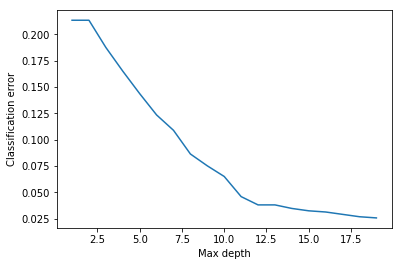

In [50]:
errors = []
depths = range(1,20)
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X,y)
    yhat = tree.predict(X)
    errors.append(np.mean(y!=yhat))
plt.plot(depths, errors)
plt.xlabel("Max depth")
plt.ylabel("Classification error");

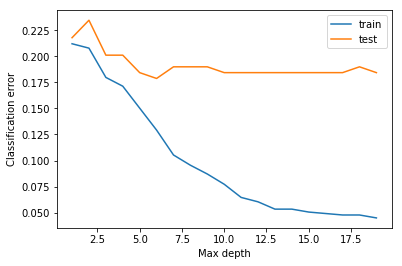

In [51]:
train_errors = []
test_errors = []
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train,y_train)
    train_errors.append(np.mean(y_train!=tree.predict(X_train)))
    test_errors.append(np.mean(y_test!=tree.predict(X_test)))
plt.plot(depths, train_errors, label="train")
plt.plot(depths, test_errors, label="test")
plt.xlabel("Max depth")
plt.ylabel("Classification error")
plt.legend();